In [22]:
using DataFrames, PythonPlot, Distributions,CSV
using SpecialFunctions 

PythonPlot.svg(true)
include("simulations.jl")
include("branching.jl")
include("drawing.jl")
FIG_PATH= "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

# FIG1A


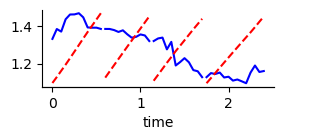

In [23]:
dt = 0.05
τ =4
D = 0.01
σY = 0.01
σx = sqrt(D*τ)
α = 0.1

β1(gr,y,y0) = gr*φ_gaussian(y,y0,σY,α)
β2(gr,y,y0) = gr*φ_gaussian(y,y0,σY,α)
θ_OU_rate = τ,D,β1,dt
θ_OU_rate_scaled = τ,D,β2,dt
init = [0,1.,1]

num_cells = 100
num_lins = 1



data= make_lineages(generator_OU_rate,init,θ_OU_rate,num_cells,num_lins);
df = DataFrame(data,["time","x","length","cell", "lineage"]);
df = df[df.cell .> 10,:];
df.time = df.time .- df.time[1];
df.cell = df.cell .- minimum(df.cell);
df[:,:T] = cumsum(df.x)*mean(diff(df.time));

fig, ax= subplots(figsize=(3,1))
ax2 = ax.twinx()
for i in unique(df.cell)[1:4]
    i  = Int(i)
    df_i = df[df.cell .== i,:]
    ax.plot(df_i.time, df_i.x,"b")
    ax2.plot(df_i.time, log.(df_i.length),"r--")
end

# remove left and right spines and ticks
ax2.spines["left"].set_visible(false)
ax2.spines["right"].set_visible(false)
# remove ticks by makig them the same color as the background
# also make the ticks small 
ax2.tick_params(colors="white", width=0.05)
#ax.tick_params(colors="white", width=0.05)
# only remove y ticks
ax2.tick_params(colors="white", which="major", left=false, right=false)
ax.spines["right"].set_visible(false)
# remove top and bottom spines
ax.spines["top"].set_visible(false)
ax2.spines["top"].set_visible(false)
ax.set_xlabel("time")

savefig(FIG_PATH*"/fig1_traj.pdf",bbox_inches="tight")
fig

# FIG1B Lineage vs. population ensemble

In [25]:
Tmax_tree = 6
function terminate(cell)
    cell.label[end,1]>Tmax_tree
end

root = create_cell(generator_OU_rate(init,θ_OU_rate))
grow_tree!(root,terminate,θ_OU_rate,generator_OU_rate)

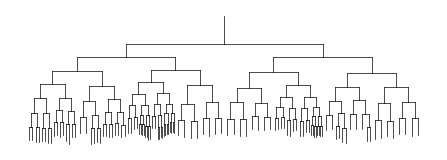

In [26]:
fig,ax = subplots(figsize=(5,2))
tight_layout()
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.spines["bottom"].set_visible(false)
ax.spines["left"].set_visible(false)
recursive_draw_tree(ax,root,0,0,0,1,0.5)
ax.tick_params(left = false, right = false , labelleft = false,labelbottom = false, bottom = false) 
savefig(FIG_PATH*"/tree.pdf",bbox_inches="tight")
fig

In [27]:
function get_xattime(root,tmax)
    label = root.label
    times =label[:,1]
    if length(label[times .< tmax,2]) == 0
        return 0
    end
    return label[times .< tmax,2][end]
end

Tmax_tree = 8
function terminate(cell)
    cell.label[end,1]>Tmax_tree
end

root = create_cell(generator_OU(init,θ_OU))
grow_tree!(root,terminate,θ_OU,generator_OU)

pop = [get_xattime(cell,Tmax_tree) for cell in get_leaf_nodes(root)];
pop = pop[pop.>0];

num_cells=10000
data= make_lineages(generator_OU,init,θ_OU,num_cells,num_lins);
df = DataFrame(data,["time","x","length","cell", "lineage"]);
df = df[df.cell .> 10,:];
df.time = df.time .- df.time[1];
df.cell = df.cell .- minimum(df.cell);
df[:,:T] = cumsum(df.x)*mean(diff(df.time));

UndefVarError: UndefVarError: `θ_OU` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

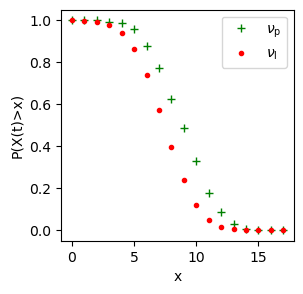

In [13]:
fig,ax = subplots(figsize=(3,3))
xrng = collect(0.25:0.1:2.0)
cdf = [length(pop[pop .> x]) for x in xrng]/length(pop)
ax.plot(cdf,"g+",label=L"\nu_{\rm p}")
xl = df.x
cdf = [length(xl[xl .> x]) for x in xrng]/length(xl)
ax.plot(cdf,".r",label=L"\nu_{\rm l}")
ax.set_ylabel("P(X(t)>x)")
ax.legend(frameon=true)
ax.set_xlabel("x")
savefig(FIG_PATH*"/fig1_selection.pdf",bbox_inches="tight")
fig